In [9]:
import uncertainties as unc  
import uncertainties.unumpy as unumpy  
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize

In [10]:
import numpy as np

wavelength = np.array([629.14, 633.88, 607.54, 589.63, 565.31, 524.58, 458.42, 395.67, 588.46 ]) #nm
#wavelength = np.array([629.14, 607.54, 524.58, 458.42, 395.67]) #nm

wavelength = unumpy.uarray(wavelength, std_devs = 0.01)
color =      [ "R" ,   "P" ,   "O",   "Y" ,   "YG"  , "G"   ,  "B" ,  "UV",  "WW" ]
rcolor = ['r','m','k', 'y', 'c',  'g', 'b', 'k', 'w' ]
voltage  =   np.array([1.714, 2.504 , 1.734 ,   1.722 , 1.717, 2.180, 2.513, 2.876, 2.489  ])
#voltage  =   np.array([1.714, 1.734 , 2.180, 2.513, 2.876 ])
voltage = unumpy.uarray(voltage, std_devs = 0.001)

Plank=6.62607004 * 10**(-34) #m**2 kg / s
Speed_Light=299792458 #m/s
e = 1.6022*10**(-19)

e_over_c = e/Speed_Light
h = []
for i in range(len(voltage)):
    wavelength_m = wavelength[i] * 10**(-9)
    h.append(e_over_c * wavelength_m* voltage[i])
    
print(h)

wmean = (np.average( unumpy.nominal_values(h), weights = unumpy.std_devs(h) ))
werror = ((1/(len(h) - 1) * sum ( (unumpy.nominal_values(h)-wmean)**2) )**0.5)
h_avg = unc.ufloat(wmean,werror)

print("real value of Plank is", Plank)
print("average value of Plank is", h_avg)



[5.763073256205798e-34+/-3.363600680269511e-37, 8.482764266684789e-34+/-3.3903275650822164e-37, 5.630150374203211e-34+/-3.2482370754858986e-37, 5.426361760881923e-34+/-3.152540875593919e-37, 5.1874388180706e-34+/-3.022615595518844e-37, 6.11173122200426e-34+/-2.8059662345120436e-37, 6.15675780880385e-34+/-2.4536417362117046e-37, 6.081602477217757e-34+/-2.120183243754657e-37, 7.827766612020642e-34+/-3.1477563318452864e-37]
real value of Plank is 6.62607004e-34
average value of Plank is (6.3+/-1.1)e-34


[6.23368731e-16]
[3.27881324e-17]


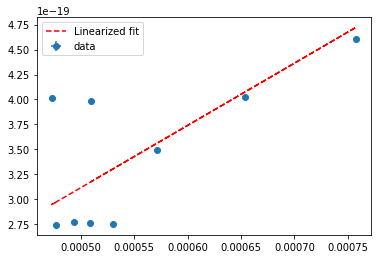

Chi Square value:
945430.8141459349
Expected value
7
Minimum Chi-Square for a good fit
-0.48331477354788266
Maximum Chi-Square for a good fit
14.483314773547882
Doubtful minimum Chi-Square for a good fit
-4.224972160321824
Doubtful maximum Chi-Square for a good fit
18.224972160321826
------------------------------


In [11]:
x=Speed_Light/wavelength*10**(-9)
y=e*voltage
plt.errorbar( unumpy.nominal_values(x) , unumpy.nominal_values(y), xerr=unumpy.std_devs(x), yerr=unumpy.std_devs(y), fmt="o", label='data')

def f(x,a):
    return a*x
popt,pcov = optimize.curve_fit(f,xdata=unumpy.nominal_values(x), ydata=unumpy.nominal_values(y), sigma=(unumpy.std_devs(y)))
print(popt)
perr = np.sqrt(np.diag(pcov))
print(perr)

plt.plot(unumpy.nominal_values(x), f(unumpy.nominal_values(x),*popt), 'r--',label='Linearized fit')

plt.legend()
plt.show()

f_degree = len(wavelength)-2
print('Chi Square value:')
print(sum( ( (unumpy.nominal_values(y)-(f(unumpy.nominal_values(x),*popt))) / unumpy.std_devs(y))**2 ) )
print('Expected value')
print(f_degree)
print('Minimum Chi-Square for a good fit')
print(f_degree - 2* (2*f_degree)**0.5)
print('Maximum Chi-Square for a good fit')
print(f_degree + 2* (2*f_degree)**0.5)
print('Doubtful minimum Chi-Square for a good fit')
print(f_degree - 3* (2*f_degree)**0.5)
print('Doubtful maximum Chi-Square for a good fit')
print(f_degree + 3* (2*f_degree)**0.5)
print('-'*30)


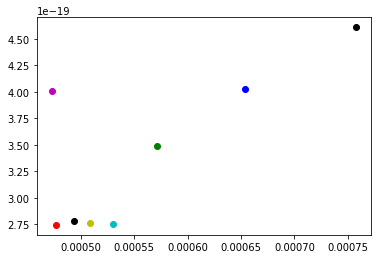

In [12]:
for i in [0,1,2,3,4,5,6,7,8] :

    x=Speed_Light/wavelength[i]*10**(-9)
    y=e*voltage[i]
    plt.errorbar( unumpy.nominal_values(x) , unumpy.nominal_values(y), xerr=unumpy.std_devs(x), yerr=unumpy.std_devs(y), fmt=rcolor[i]+'o', label='data')
